In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [102]:
# vamos obter o modelo
# baixamos o modelo com todos os pesos
# signfica que eu posso fazer uma predição
modelo = tf.keras.applications.ResNet50(weights='imagenet')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
#/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer-Learning-Data.zip

In [10]:
caminho = '/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer-Learning-Data.zip'
arquivo_compactado = zipfile.ZipFile(file=caminho, mode="r") # r read para ler o arquivo
arquivo_compactado.extractall("./") # para extrair o conteudo do arquivo compactado
arquivo_compactado.close()

In [35]:
# target_size=(224, 224)
bicicleta = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer Learning Data/bicycle.png', target_size=(224, 224))

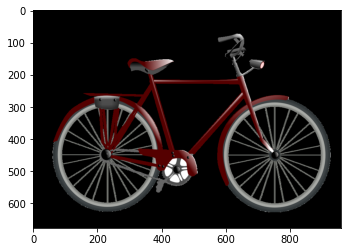

In [14]:
plt.imshow(bicicleta)

In [28]:
type(bicicleta)

PIL.Image.Image

In [36]:
bicicleta_array  = tf.keras.preprocessing.image.img_to_array(bicicleta)

In [37]:
type(bicicleta_array)

numpy.ndarray

In [23]:
bicicleta_array[2][0]

array([0., 0., 0.], dtype=float32)

In [39]:
bicicleta_array.shape
# (224 largura, 224 altura, 3 cores RGB red green blue)

(224, 224, 3)

In [40]:
# transformar ( 224, 224, 3) em (1, 224, 224, 3)
bicicleta_array = np.expand_dims(bicicleta_array, axis=0)

In [43]:
bicicleta_array.shape

(1, 224, 224, 3)

In [45]:
bicicleta_array.max()

255.0

In [47]:
bicicleta_array.min()

0.0

In [48]:
# falta normalizar

In [49]:
bicicleta_array_normalizada = tf.keras.applications.resnet50.preprocess_input(bicicleta_array)

In [51]:
bicicleta_array_normalizada.max()

151.061

In [53]:
bicicleta_array_normalizada.min()

-123.68

In [55]:
predicao_modelo_resnet50 = modelo.predict(bicicleta_array_normalizada)

In [58]:
predicao_modelo_resnet50.shape

(1, 1000)

In [61]:
print('Predições ', tf.keras.applications.resnet50.decode_predictions(predicao_modelo_resnet50, top=5))

Predições  [[('n02835271', 'bicycle-built-for-two', 0.6329612), ('n03792782', 'mountain_bike', 0.05375577), ('n04482393', 'tricycle', 0.04975813), ('n03599486', 'jinrikisha', 0.015690288), ('n04507155', 'umbrella', 0.010513393)]]


In [62]:
# Agora que iremos começar a usar transfer learning

In [69]:
# Para obter o modelo base e aplicarmos a nossa rede neural densa 
modelo_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

In [71]:
modelo_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [78]:
modelo_personalizado = modelo_base.output

In [79]:
# eu quis reduzir ainda mais a dimensionalidade antes da camada densa
modelo_personalizado = tf.keras.layers.GlobalAveragePooling2D()(modelo_personalizado)

In [80]:
# primeira camada oculta com 1024 neurônios função de ativação relu
modelo_personalizado = tf.keras.layers.Dense(units=1024, activation='relu')(modelo_personalizado)

# segunda camada oculta com 1024 neurônios função de ativação relu
modelo_personalizado = tf.keras.layers.Dense(units=1024, activation='relu')(modelo_personalizado)

# terceira camada oculta com 1024 neurônios função de ativação relu
modelo_personalizado = tf.keras.layers.Dense(units=1024, activation='relu')(modelo_personalizado)

# quarta camada oculta com 512 neurônios função de ativação relu
modelo_personalizado = tf.keras.layers.Dense(units=512, activation='relu')(modelo_personalizado)

# Estou na  última camada. Considerando que desejo classificar entre gato e cachorro. Portanto são duas classes
# Logo a nossa camada de saída possuirá apenas 2 neurônios
# Falta resolver qual função de ativação usar ? Como faço ?
# São duas possibilidades logo eu poderia usar sigmoid 
# Poderia usar também softmax que informará a probabilidade de uma lista de entrada
modelo_personalizado_predicao = tf.keras.layers.Dense(units=2, activation='softmax')(modelo_personalizado)

In [81]:
# Para criar o modelo definitivo você precisa de um modelo base
# inputs=modelo_base.input, 

# outputs do modelo definitivo  outputs=modelo_personalizado_predicao
modelo_definitivo = tf.keras.models.Model(inputs=modelo_base.input, outputs=modelo_personalizado_predicao)

In [83]:
modelo_definitivo.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [88]:
for indice, camada in enumerate(modelo_definitivo.layers):
  print('indice:', indice, ' Camada:',camada.name, 'Treinado:',camada.trainable)

indice: 0  Camada: input_7 Treinado: True
indice: 1  Camada: conv1_pad Treinado: True
indice: 2  Camada: conv1_conv Treinado: True
indice: 3  Camada: conv1_bn Treinado: True
indice: 4  Camada: conv1_relu Treinado: True
indice: 5  Camada: pool1_pad Treinado: True
indice: 6  Camada: pool1_pool Treinado: True
indice: 7  Camada: conv2_block1_1_conv Treinado: True
indice: 8  Camada: conv2_block1_1_bn Treinado: True
indice: 9  Camada: conv2_block1_1_relu Treinado: True
indice: 10  Camada: conv2_block1_2_conv Treinado: True
indice: 11  Camada: conv2_block1_2_bn Treinado: True
indice: 12  Camada: conv2_block1_2_relu Treinado: True
indice: 13  Camada: conv2_block1_0_conv Treinado: True
indice: 14  Camada: conv2_block1_3_conv Treinado: True
indice: 15  Camada: conv2_block1_0_bn Treinado: True
indice: 16  Camada: conv2_block1_3_bn Treinado: True
indice: 17  Camada: conv2_block1_add Treinado: True
indice: 18  Camada: conv2_block1_out Treinado: True
indice: 19  Camada: conv2_block2_1_conv Treinado:

In [91]:
# Estou informando que estas camadas até 174 não sejam treinadas
for camada in modelo_definitivo.layers[:175]:
  camada.trainable = False

In [94]:
# Considerando o código acima que a partir da camada 175 o atributo trainable é True o código não seria necessário
# Este código é para informar que a partir da camada 175 desejo treinar
#[<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D at 0x7fd6c8a8ec18>,
# <tensorflow.python.keras.layers.core.Dense at 0x7fd6c8a0d7b8>,
# <tensorflow.python.keras.layers.core.Dense at 0x7fd6c9305be0>,
# <tensorflow.python.keras.layers.core.Dense at 0x7fd6c8b3d9b0>,
# <tensorflow.python.keras.layers.core.Dense at 0x7fd6c8a11630>,
# <tensorflow.python.keras.layers.core.Dense at 0x7fd6c8a68240>]
for camada in modelo_definitivo.layers[175:]:
  camada.trainable = True

In [95]:
for indice, camada in enumerate(modelo_definitivo.layers):
  print('indice:', indice, ' Camada:',camada.name, 'Treinado:',camada.trainable)

indice: 0  Camada: input_7 Treinado: False
indice: 1  Camada: conv1_pad Treinado: False
indice: 2  Camada: conv1_conv Treinado: False
indice: 3  Camada: conv1_bn Treinado: False
indice: 4  Camada: conv1_relu Treinado: False
indice: 5  Camada: pool1_pad Treinado: False
indice: 6  Camada: pool1_pool Treinado: False
indice: 7  Camada: conv2_block1_1_conv Treinado: False
indice: 8  Camada: conv2_block1_1_bn Treinado: False
indice: 9  Camada: conv2_block1_1_relu Treinado: False
indice: 10  Camada: conv2_block1_2_conv Treinado: False
indice: 11  Camada: conv2_block1_2_bn Treinado: False
indice: 12  Camada: conv2_block1_2_relu Treinado: False
indice: 13  Camada: conv2_block1_0_conv Treinado: False
indice: 14  Camada: conv2_block1_3_conv Treinado: False
indice: 15  Camada: conv2_block1_0_bn Treinado: False
indice: 16  Camada: conv2_block1_3_bn Treinado: False
indice: 17  Camada: conv2_block1_add Treinado: False
indice: 18  Camada: conv2_block1_out Treinado: False
indice: 19  Camada: conv2_bloc

In [96]:
imagens_treino_gerador_dados = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [97]:
gerador_imagens_treino = imagens_treino_gerador_dados.flow_from_directory('/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer Learning Data/train',
target_size=(224,224),
color_mode='rgb',
batch_size=32,
class_mode='categorical',
shuffle=True
)

Found 202 images belonging to 2 classes.


In [99]:
gerador_imagens_treino.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [100]:
modelo_definitivo.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
# fit_generator permite buscar as imagens e realizar o treinamento
historico_epocas = modelo_definitivo.fit_generator(generator=gerador_imagens_treino, epochs=3)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
7/7 [==============================] - 49s 7s/step - loss: 2.1805 - accuracy: 0.7228
Epoch 2/3
7/7 [==============================] - 26s 4s/step - loss: 0.6137 - accuracy: 0.9010
Epoch 3/3
7/7 [==============================] - 26s 4s/step - loss: 0.0774 - accuracy: 0.9653


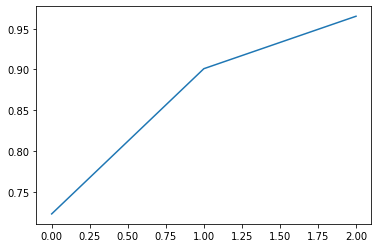

In [104]:
plt.plot(historico_epocas.history['accuracy'])

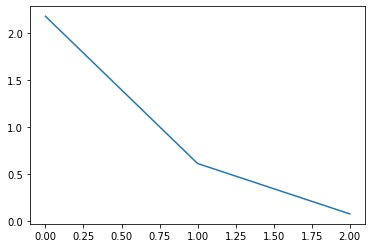

In [106]:
plt.plot(historico_epocas.history['loss'])

In [129]:
#/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer Learning Data/dog.309.jpg

arquivo_cachorro = '/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer Learning Data/dog.309.jpg'

cachorro = tf.keras.preprocessing.image.load_img(r'/content/drive/My Drive/curso_fundamentos_de_deep_learning_A/08_TransferLearning/Transfer Learning Data/dog.309.jpg', target_size=(224,224))


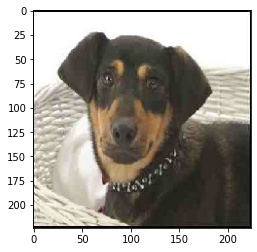

In [130]:
plt.imshow(cachorro)

In [131]:
cachorro_array = tf.keras.preprocessing.image.img_to_array(cachorro)

In [132]:
cachorro_array.shape  # (224, 224, 3)  virar (1, 224, 224, 3)

(224, 224, 3)

In [133]:
# (224, 224, 3)  virar (1, 224, 224, 3)
cachorro_array = np.expand_dims(cachorro_array, axis=0)

In [134]:
cachorro_array.shape

(1, 224, 224, 3)

In [135]:
cachorro_array_normalizado = tf.keras.applications.resnet50.preprocess_input(cachorro_array)

In [136]:
resultado_predicao = modelo_definitivo.predict(cachorro_array_normalizado)

In [138]:
resultado_predicao

array([[1.6814058e-05, 9.9998319e-01]], dtype=float32)